# Section E. Multiclass Perceptron
## Question 6: Multiclass Perceptron
### Question 6 (I)
Loading data

In [1]:
## Libraries:
library(MASS) # generates multivariate Gaussian sampels
library(ggplot2)
library(reshape2)

#load data:
train <- read.csv('Task1D_train.csv')
test <- read.csv('Task1D_test.csv')

#shuffle data
train.index <- sample(1:nrow(train), nrow(train), replace = FALSE)
test.index <- sample(1:nrow(test), nrow(test), replace = FALSE)
train = train[train.index,]
test= test[test.index,]

# class values
C1 <- 1; C2 <- 2;C3 <- 3

#change y column to factor
train$y = as.factor(train$y)
test$y = as.factor(test$y)

In [2]:
index_train = 1:nrow(train)
index_test = 1:nrow(test)
train.data <- train[index_train,-5] # grab all rows, leave out the species (last column)
train.label <- train[index_train,5]
test.data <- test[index_test,-5] # grab all rows, leave out the species (last column)
test.label <- test[index_test,5]


### Question 3 (II)
Initializing parameters, and Implementing the multiclass perceptron.

In [3]:
## Basis function (Step 1)
Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 as phi_0

In [4]:
# Initializing parameters
eta <- 0.01 # Learning rate
epsilon <- 0.001 # Stoping criterion
tau.max <- 15 # Maximum number of iterations

# Convention for class labels
T1 <- ifelse(test.label == 'C1', 1,-1)
T2 <- ifelse(test.label == 'C2', 1,-1)
T3 <- ifelse(test.label == 'C3', 1,-1)

W <- matrix(,nrow=nlevels(train$y), ncol=ncol(Phi)) # Empty Weight vector

# Random initial values for weight vectors
W[1,] <- runif(ncol(Phi))
W[2,] <- runif(ncol(Phi))
W[3,] <- runif(ncol(Phi))

errors <- data.frame('Tau'=1:15) # Placeholder for errors


### Question 6 (III)
Training two multiclass perceptron models on the provided training data by setting the learning rates η to .09 and .01 respectively and evaluating the error of the models on the test data, after processing every 5 training data points (mini batch). 

In [5]:
test.data <- as.matrix(cbind(1, test.data))
train.len = nrow(train.data)
test.len = nrow(test.data)

# Main Loop (Step 2):

#iteration on eta for eta = 0.01 and 0.09
for (eta in seq(0.01,0.09,0.08)){
    tau <- 1 # iteration counter 
    
    # tau.max (15) maximum updates to weights
    while(tau <= tau.max){
        
        # iteration for batch of 5 training points
        for (i in seq(5,train.len,5)){
        if (tau > 15) {break}
            
            # for every point in batch of size 5
            for(j in ((i-5)+1):i){
        
              # calculate P(x|C) for eah class
              y_val<-c(Phi[j,]%*%W[1,],Phi[j,]%*%W[2,],Phi[j,]%*%W[3,])
              # select class with maximum Probability
              y <- which.max(y_val)
              label = paste(c("C", y), collapse = "")
              
              # look for missclassification, if predicted wrong update weights
              if(train.label[j] != label){
                W[y,] <- W[y,] - eta * Phi[j,]            # Update wrong label
                W[eval(parse(text=train.label[j])),] <- W[eval(parse(text=train.label[j])),] + eta * Phi[j,]   #Update correct label
            
          }
        }
          
        # calculating missclassified samples on predictions made by model trained on set of every batch of 5 training points
        error = 0
            
        #for every samle in test data
        for(k in 1:test.len){
          
          # predict class, by selecting class with maximum probability P(x|C)
          y_val<-c(test.data[k,]%*%W[1,],test.data[k,]%*%W[2,],test.data[k,]%*%W[3,])
          y <- which.max(y_val)
          label = paste(c("C", y), collapse = "")
           
          # check if prediction is true or false
          if (label!=test.label[k]){
            error = error + 1            # count error if prediction is false
          }
        }
            
        # store the error for every batch and eta value
        if (eta == 0.01){errors[tau,'Eta 0.01'] <- (error/test.len)*100}
        else {errors[tau,'Eta 0.09'] <- (error/test.len)*100}

        tau <- tau + 1         # increment to counter
      }

    }}

In [10]:
errors

Tau Eta 0.01 Eta 0.09
1   1  60.00000 33.33333
2   2  33.33333 66.66667
3   3  33.33333 50.66667
4   4  33.33333 65.33333
5   5  33.33333 34.66667
6   6  33.33333 33.33333
7   7  33.33333 33.33333
8   8  33.33333 33.33333
9   9  33.33333 33.33333
10 10  33.33333 33.33333
11 11  33.33333 33.33333
12 12  33.33333 33.33333
13 13  33.33333 33.33333
14 14  18.66667 33.33333
15 15  33.33333 33.33333

Ploting the testing errors of two models built based on the learning rates .09 and .01(with different colors) versus the number of mini-batches.

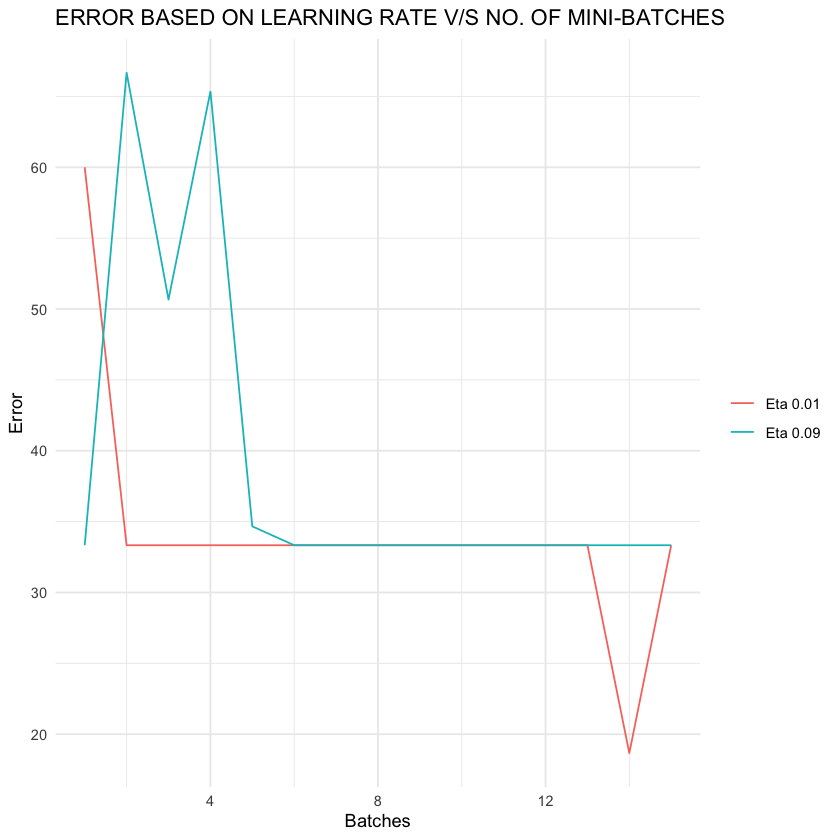

In [14]:
# plot misclassification for test data sets
error.m <- melt(errors, id='Tau') # reshape for visualization
names(error.m) <- c('Batches', 'Eta', 'Error')
ggplot(data=error.m, aes(x=Batches, y=Error, color=Eta)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("ERROR BASED ON LEARNING RATE V/S NO. OF MINI-BATCHES")

The line graph above for both eta = 0.01 and 0.09 follows same pattern. The test error is higher at the starting when training data size is smaller.
Testing error decreased for both eta = 0.01 and 0.09 at batch size 2 and 5 respectivelly.
This error somewhat remained constant.

To conclude, we can say that the test error is less when the model is trained on a larger data.